In [1]:
%run -i ct_dataproc.ipynb
import cv2
import numpy as np
import numpy as np
import tifffile as ti
import scipy.io as sio
import matplotlib.pyplot as plt

cyto_path = r"C:\Users\yuxin\Desktop\tc_data\cyto.csv"
nu_path = r"C:\Users\yuxin\Desktop\tc_data\nu.csv"
df = match(cyto_path,nu_path) 

csv_path = r'C:\Users\yuxin\Desktop\tc_data\228df'
df.to_csv(csv_path+'.csv', index=False)  

# Matching

In [8]:
def read_tiff_frames(tiff_path):
    with ti.TiffFile(tiff_path) as tif:
        frames = [page.asarray() for page in tif.pages]
    return np.stack(frames)

In [22]:
#read images
tiff_path = r"C:\Users\yuxin\Desktop\tc_data\228_m.tif"
frames = read_tiff_frames(tiff_path)
#params
color=(0, 255, 0)
thickness = 2

modified_images = []
for i in range(max(list(df['frame']))+1):
    image = frames[i,:,:,:]
    temp = df[df['frame'] == i]
    for index, row in temp.iterrows():
         if ~np.isnan(row[1]):
            cyto_point = (int(row[3]/0.65),int(row[4]/0.65)) #1 pixel = 0.65 microns
            nu_point = (int(row[5]/0.65),int(row[6]/0.65))
            cv2.line(image, nu_point, cyto_point, color, thickness)
         else:
            continue
    #modified_image = image
    modified_images.append(image)
stacked_images = np.stack(modified_images)
# Save as a multi-page TIFF
output_tiff_path = 'match_228_m.tif'
ti.imwrite(output_tiff_path, stacked_images)

# Distribution

In [2]:
#FRET channels
fc = ['cfp','yfp']
#State sampling interval
tsamp = 6
#Declare (new) output channel names
cn = ['EKAR']
#Declare matching input channel indices (or descriptors)
#for ratios list numerator (or FRET Donor) first, x/y => [x,y]
ci = [[5,6]]
#Set minimum track length
minL = 25 
#Set maximum gap size
maxGap = 2
#Set 'start only' flag
sto = False
prat = []

# Check if 'fc' exists and is not empty
if 'fc' in locals() and fc:  
    GMD = mdi
    # Calculate the power ratio for FRET signals
    prat = iman_powerratio_est(GMD, None, fc)
    prat = list(prat.astype(float))


# Usage difference: take one series as input, not multiple
d,p = ct_dataproc(df,
    tsamp = tsamp,
    name = cn,
    ind = ci,
    pwrat = prat,
    dlengthmin = minL,
    gapmax = maxGap,
    startonly = sto)


KAR 2


In [3]:
df

,nu_track_id,cyto_track_id,frame,cyto_X,cyto_Y,nu_X,nu_Y,cyto_CH1_mean,cyto_CH2_mean,cyto_CH3_mean,cyto_CH4_mean,nu_CH1_mean,nu_CH2_mean,nu_CH3_mean,nu_CH4_mean
0,0.0,341.0,0,796.925325,105.776948,796.369737,105.808882,2011.326523,6635.431630,1228.291505,50.370183,2560.272248,3416.036273,612.361274,152.629639
1,1.0,77.0,0,64.973498,297.618634,66.014634,297.066986,1625.239272,5584.728960,1067.502226,173.003018,2560.848995,2838.689749,511.753242,252.346311
2,2.0,327.0,0,503.488718,108.626141,503.084320,109.098794,1969.582950,7211.201252,1332.649972,78.813709,2405.344105,5446.386990,1009.849531,136.082341
3,3.0,451.0,0,240.028214,108.448692,238.874151,110.040078,1811.097313,5718.006060,1032.029575,113.443089,2080.893593,3552.034788,638.322809,177.135599
4,4.0,NaN,0,322.004639,91.205498,315.605556,108.586111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259008,2519.0,1777.0,227,106.503991,53.042385,107.382907,48.075080,1474.659020,4629.579687,712.588444,165.704261,1797.078900,3479.256388,518.446095,205.669936
259009,2520.0,2941.0,227,273.911585,242.126982,277.369231,241.238462,1405.569482,3618.685634,633.797118,141.170542,1178.975889,2471.502190,438.265632,168.026761
259010,2521.0,3026.0,227,112.055877,591.822170,113.288636,591.556818,1440.460623,3574.939356,688.705573,214.386805,1144.998970,2324.799118,460.732851,267.886051
259011,2522.0,837.0,227,451.197321,341.245536,448.600704,344.884507,1516.150667,4493.557442,710.650314,95.152936,1712.439810,4134.842412,606.642312,128.642373


In [4]:
f = 0
f0 = d['data'][0][:,f]
mat_fname = r"/Users/xinranyu/Desktop/1/Processed Data/20180123_Downstairs_proc_EKAR_nu.mat"
mc = sio.loadmat(mat_fname)
md = mc['d'][0][0][0][0][0][0][0][0]
m0 = md[:,f]

In [5]:
m0.shape,f0.shape

((770,), (1325,))

In [6]:
np.nanmean(f0),np.nanmean(m0)

(-0.2570819744444383, -0.23126199715804993)

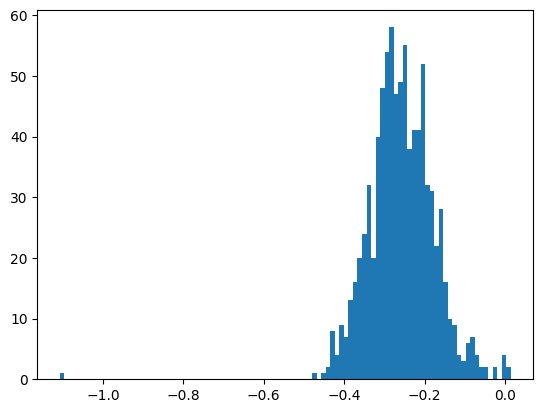

In [7]:
#python result
plt.hist(f0,bins=100)
plt.show() 

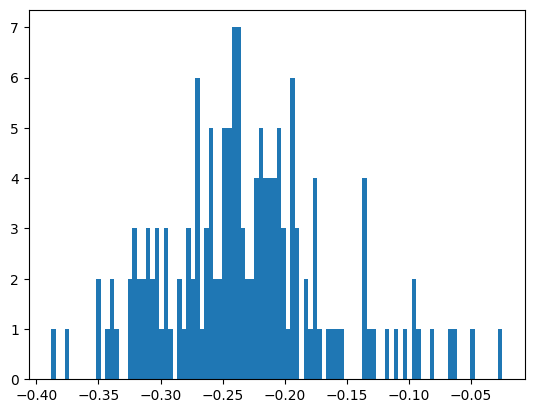

In [8]:
#MATLAB result
plt.hist(m0,bins=100)
plt.show() 

In [19]:
d['data'][0]

array([[        nan,         nan,         nan, ..., -0.40544636,
        -0.40443702, -0.39898594],
       [-0.1824522 , -0.19648246, -0.20101027, ..., -0.10976496,
        -0.08555284,         nan],
       [-0.21123298, -0.23252567, -0.26527638, ..., -0.32249037,
        -0.25009512, -0.17424659],
       ...,
       [        nan,         nan,         nan, ..., -0.28463871,
        -0.2474934 , -0.30230017],
       [        nan,         nan,         nan, ..., -0.246659  ,
        -0.27744589, -0.3366126 ],
       [        nan,         nan,         nan, ..., -0.49317232,
        -0.46356767, -0.49717299]])

In [20]:
md

array([[-0.09594988, -0.06426421, -0.09221556, ..., -0.09424493,
        -0.08545455,  0.01092761],
       [-0.2608058 , -0.27333   , -0.27333341, ..., -0.28707703,
        -0.28617839, -0.28026454],
       [-0.21005498,         nan,         nan, ..., -0.41283838,
        -0.40651387, -0.33409139],
       ...,
       [        nan,         nan,         nan, ..., -0.24890133,
        -0.26285586, -0.30880103],
       [        nan,         nan,         nan, ..., -0.26670992,
        -0.29544425, -0.35652082],
       [        nan,         nan,         nan, ..., -0.48080724,
        -0.51537941, -0.45445377]])